# Check HSE genes in PCs

https://www.pnas.org/content/113/4/E469 suggest that Human Supragranular Enriched genes distinguish cortical areas in humans ... but are they (merely) related to neurons vs glia?

## Setup

In [2]:
%cd work/notebooks

/home/jovyan/work/notebooks


In [3]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [4]:
# Import local code
import sys
sys.path.append('../code')
from gradientVersion import *
from processing_helpers import *
from analysis_helpers import *
from enrichments import *

%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
from brainspan import *

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down


## Check

In [5]:
hse_genes = [
'BEND5',
'C1QL2',
'CACNA1E',
'COL24A1',
'COL6A1',
'CRYM',
'KCNC3',
'KCNH4',
'LGALS1',
'MFGE8',
'NEFH',
'PRSS12',
'SCN3B',
'SCN4B',
'SNCG',
'SV2C',
'SYT2',
'TPBG',
'VAMP1'
]

In [6]:
# data_dir = '../data/abagen-data/expression/'
# hcp_3donors_ds5 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds5.csv', index_col=0))
# hcp_3donors_ds9 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0))

In [7]:
dm_hcp_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')
weights = dm_hcp_3d_ds5.weights

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [8]:
null_weights_shuffle = shuffle_gene_weights(weights, n=10000, rank=False)

In [9]:
hse_genes = pd.DataFrame({'gene':hse_genes, 'label':'HSE'})

In [10]:
true_, null_ = compute_enrichments(weights.iloc[:,:3], null_weights_shuffle, hse_genes, how='mean')
null_p = compute_null_p(true_, null_, adjust='fdr_bh')

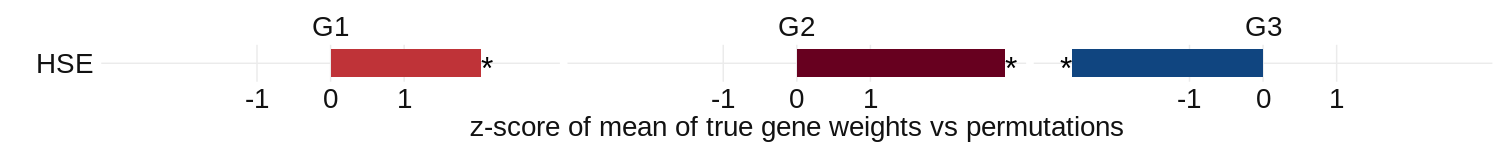

In [11]:
%%R -i null_p -w 15 -h 1.5 --units in -r 100
source("../code/enrichmentsPlots.R")
plot_enrichment_bars_z(null_p, xlab='z-score of mean of true gene weights vs permutations')

In [12]:
null_p

,label,G,pct,true_mean,null_mean,null_std,z,pos,p,q,sig
0,HSE,G1,0.9799,0.468899,0.000722,0.228619,2.047850,True,0.0402,0.0402,True
1,HSE,G2,0.9977,0.651233,0.000360,0.229735,2.833147,True,0.0046,0.0138,True
2,HSE,G3,0.0047,-0.599178,-0.001448,0.229946,-2.599438,False,0.0094,0.0141,True


In [22]:
version = dm_hcp_3d_ds5

gene_list = set(hse_genes).intersection(version.weights.index)
# print(set(hse_genes).difference(gene_list))

ranks = (version.weights.rank()
 .apply(lambda x: np.round(x/x.max(),2))
 .loc[gene_list, :].sort_values(2)
 .set_axis([f'G{i+1}' for i in range(5)],axis=1)
)
ranks

,G1,G2,G3,G4,G5
BEND5,0.66,0.91,0.03,0.06,0.41
TPBG,0.70,0.98,0.05,0.55,0.74
PRSS12,0.45,0.91,0.06,0.63,0.35
KCNH4,0.83,0.07,0.07,0.89,0.35
CRYM,0.10,0.51,0.07,0.23,0.62
SNCG,0.34,0.72,0.11,0.09,0.15
COL24A1,0.48,0.96,0.17,0.80,0.16
MFGE8,0.76,0.84,0.19,0.21,0.83
COL6A1,0.92,0.56,0.21,0.28,0.77
SCN3B,0.01,0.37,0.23,0.31,0.38


In [7]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(ranks)):
    ax.scatter(ranks.PC1[i], ranks.PC2[i], ranks.PC3[i], c='r', marker='o')
    ax.text(ranks.PC1[i], ranks.PC2[i], ranks.PC3[i], f'{ranks.index[i]}', size=5, zorder=1, color='k')

ax.set_xlabel('PC1 % rank')
ax.set_ylabel('PC2 % rank')
ax.set_zlabel('PC3 % rank')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

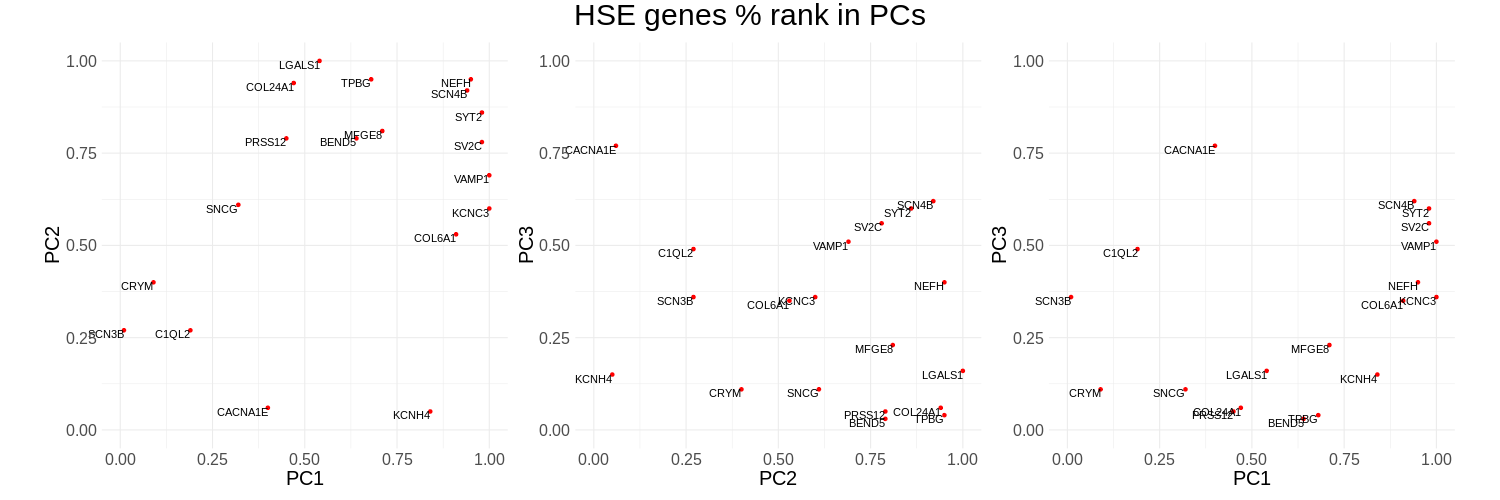

In [67]:
%%R -i ranks -w 1500 -h 500
g1 <- ggplot(ranks,aes(x=PC1, y=PC2)) + geom_point(color='red') + 
    geom_text(aes(label=rownames(ranks)), hjust=1, vjust=1)
g2 <- ggplot(ranks,aes(x=PC2, y=PC3)) + geom_point(color='red') + 
    geom_text(aes(label=rownames(ranks)), hjust=1, vjust=1)
g3 <- ggplot(ranks,aes(x=PC1, y=PC3)) + geom_point(color='red') + 
    geom_text(aes(label=rownames(ranks)), hjust=1, vjust=1)

((g1 | g2 | g3) & xlim(c(0,1)) & ylim(c(0,1)) & 
 theme_minimal() & coord_fixed(clip='off') & 
 theme(text=element_text(size=20))) +
 plot_annotation(title = 'HSE genes % rank in PCs',
                theme = theme(plot.title = element_text(size = 30, hjust=.5)))